In [5]:
using NetworkEpidemics
using LightGraphs
using Statistics
using Plots
using ColorSchemes
using Random

In [6]:
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SI}) = Metapopulation(mp.h, mp.D, SI(χ*mp.dynamics.β))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIS}) = Metapopulation(mp.h, mp.D, SIS(χ*mp.dynamics.β, mp.dynamics.γ))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIR}) = Metapopulation(mp.h, mp.D, SIR(χ*mp.dynamics.β, mp.dynamics.δ))

CorrectedMetapopulation (generic function with 3 methods)

In [9]:
Random.seed!(2020);

In [8]:
N = 1000
M = 10

10

In [10]:
h = erdos_renyi(M, 0.3)
g = static_scale_free(N, 20*N, 2)

{1000, 20000} undirected simple Int64 graph

In [11]:
k = degree(g)

1000-element Array{Int64,1}:
   9
  14
   6
  13
  10
  13
   9
  11
   8
  12
  11
  11
  10
   ⋮
 338
 372
 396
 397
 444
 475
 492
 559
 620
 720
 817
 944

In [12]:
χ₁ = mean(closeness_centrality(g))
χ₂ = mean(k.^2)/(mean(k)*N)
χ₃ = mean(k)/N #ne(g)/(n*(n-1)/2)
χ₄ = global_clustering_coefficient(g)

0.15357828528401324

In [13]:
β = 0.1 # transmission rate
γ = 0.3 # recovery rate
D = 0.1 # diffusion rate

0.1

In [14]:
mp = Metapopulation(h, D, SIR(β,γ))
mp_1 = CorrectedMetapopulation(χ₁, mp)
mp_2 = CorrectedMetapopulation(χ₂, mp)
mp_3 = CorrectedMetapopulation(χ₃, mp)
mp_4 = CorrectedMetapopulation(χ₄, mp)

mpx = Metaplex(g, h, D, SIR(β,γ))

Metaplex{SIR}({1000, 20000} undirected simple Int64 graph, {10, 17} undirected simple Int64 graph, [0.1, 0.1, 0.1], SIR(0.1, 0.3))

In [15]:
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = [div(i-1,div(N,M))+1 for i in 1:N]

1000-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [16]:
x0_mp = Array{Int,2}(undef, M,2)
x0_mp[2:M,:] .= [100 0]
x0_mp[1, :] .= [90, 10]

2-element view(::Array{Int64,2}, 1, :) with eltype Int64:
 90
 10

In [17]:
# infected seed randomly dispersed over meta-nodes
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = rand(1:M, N)
x0_mp = zeros(Int, M, 3)
for i in 1:N
    x0_mp[x0_μ[i], x0_i[i]] += 1
end

In [18]:
tmax = 60.0
nmax = 100000
nsims = 1000
nbins = 200

200

In [19]:
ts_av_mpx, u_av_mpx = average(mpx, [x0_i,x0_μ], tmax=tmax, nmax=nmax, nbins=nbins, nsims=nsims, progressbar=false);

Progress:   0%|█                                        |  ETA: 0:29:07

Progress:   2%|█                                        |  ETA: 0:02:17

Progress:   4%|██                                       |  ETA: 0:01:36

Progress:   6%|███                                      |  ETA: 0:01:22

Progress:   8%|████                                     |  ETA: 0:01:14

Progress:  10%|████                                     |  ETA: 0:01:09

Progress:  11%|█████                                    |  ETA: 0:01:04

Progress:  13%|██████                                   |  ETA: 0:01:01

Progress:  15%|███████                                  |  ETA: 0:00:59

Progress:  17%|███████                                  |  ETA: 0:00:56

Progress:  18%|████████                                 |  ETA: 0:00:54

Progress:  20%|█████████                                |  ETA: 0:00:52

Progress:  22%|██████████                               |  ETA: 0:00:51

Progress:  24%|██████████                          

(range(0.0, stop=60.0, length=200), [[87.0 92.0 … 104.0 95.0; 86.092 91.203 … 102.728 93.844; … ; 54.956 38.545 … 37.634 38.901; 54.953 38.502 … 37.607 38.927], [1.0 0.0 … 2.0 1.0; 0.914 0.027 … 1.892 0.91; … ; 0.016 0.012 … 0.003 0.013; 0.015 0.012 … 0.003 0.013], [0.0 0.0 … 0.0 0.0; 0.109 0.001 … 0.152 0.087; … ; 32.717 21.477 … 21.767 21.757; 32.79 21.483 … 21.719 21.743]])

In [21]:
ts_mf, u_mf = meanfield(mp, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_1, u_mf_1 = meanfield(mp_1, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_2, u_mf_2 = meanfield(mp_2, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_3, u_mf_3 = meanfield(mp_3, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_4, u_mf_4 = meanfield(mp_4, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_mpx, u_mf_mpx = meanfield(mpx, [x0_i,x0_μ], tmax=tmax, saveat=ts_av_mpx)

([0.0, 0.30150753768844224, 0.6030150753768845, 0.9045226130653266, 1.206030150753769, 1.5075376884422111, 1.809045226130653, 2.1105527638190953, 2.412060301507538, 2.71356783919598  …  57.28643216080402, 57.58793969849246, 57.8894472361809, 58.19095477386934, 58.49246231155779, 58.79396984924623, 59.095477386934675, 59.39698492462311, 59.698492462311556, 60.0], [[87.0 92.0 … 104.0 95.0; 86.09058837772808 91.08758688472574 … 102.61303634371339 93.92357801349141; … ; 41.50527551361975 29.407678952115827 … 27.958960293885436 29.408448454317526; 41.513741677088476 29.390923591907242 … 27.955917826775206 29.39165906600008], [1.0 0.0 … 2.0 1.0; 0.9461167288020945 0.018057129823404783 … 1.861874097697024 0.9211952333041098; … ; 0.0008473095064921313 0.0005847410046687763 … 0.0003467699492192418 0.000584801413732827; 0.0007968663238745378 0.0005494191856352143 … 0.00032573251293578225 0.0005494736917063094], [0.0 0.0 … 0.0 0.0; 0.0881700755316799 0.0016702132351611176 … 0.17185050702558122 0.

In [22]:
colors = ColorSchemes.tab10

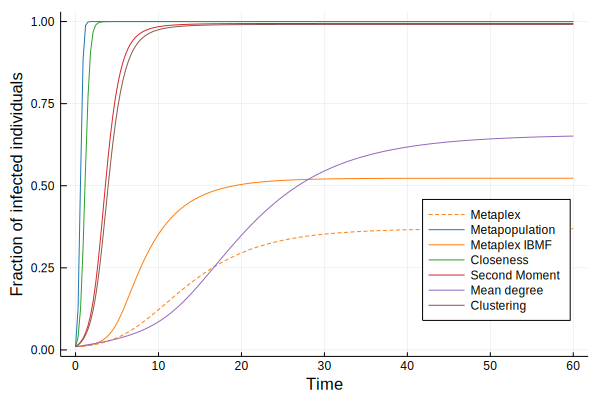

In [23]:
plot(ts_av_mpx, sum(u_av_mpx[2], dims=2)/N + sum(u_av_mpx[3], dims=2)/N,
    label="Metaplex",
    xlabel="Time",
    ylabel="Fraction of infected individuals",
    linestyle=:dash,
    legend=:bottomright,
    color = colors[2]
    )
    plot!(ts_mf, sum(u_mf[2], dims=2)/N + sum(u_mf[3], dims=2)/N,
    #label="Meanfield (No correction)",
    label = "Metapopulation",
#    xlabel="Time",
#    ylabel="Fraction of infected individuals",
    #legend=:bottomright,
    color = colors[1]
    )
    plot!(ts_mf_mpx, sum(u_mf_mpx[2], dims=2)/N + sum(u_mf_mpx[3], dims=2)/N,
#    label="Meanfield (Metaplex)",
    label = "Metaplex IBMF",
    color = colors[2]
    )
    plot!(ts_mf_1, sum(u_mf_1[2], dims=2)/N + sum(u_mf_1[3], dims=2)/N,
#    label="Meanfield (Closeness Centrality)",
    label = "Closeness",
    color = colors[3]
    )
    plot!(ts_mf_2, sum(u_mf_2[2], dims=2)/N + sum(u_mf_2[3], dims=2)/N,
#    label="Meanfield (Second Moment)",
    label = "Second Moment",
    color = colors[4]
    )
    plot!(ts_mf_3, sum(u_mf_3[2], dims=2)/N + sum(u_mf_3[3], dims=2)/N,
#    label="Meanfield (Mean degree)",
    label = "Mean degree",
    color = colors[5]
    )
    plot!(ts_mf_4, sum(u_mf_4[2], dims=2)/N + sum(u_mf_4[3], dims=2)/N,
#    label="Meanfield (Clustering Coefficient)",
    label = "Clustering",
    color = colors[6]
    )